# Salary of Full Stack by country by years of experience

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
# %config InlineBackend.figure_format = 'svg'

In [138]:
# df = pd.read_csv('./data/developer_survey_2019/survey_results_public.csv')
# COMP_KEY = COMP_KEY

df = pd.read_csv('./data/developer_survey_2022/survey_results_public.csv')
COMP_KEY = 'ConvertedCompYearly'

In [139]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

## Drop NA

In [140]:
ddf = df[[COMP_KEY, 'Country', 'YearsCodePro', 'DevType']].dropna(how='any')

## Drop all years of experience except 1-10 years

In [141]:
ddf = ddf[ddf['YearsCodePro'] != 'Less than 1 year']
ddf = ddf[ddf['YearsCodePro'] != 'More than 50 years']
ddf['YearsCodePro'] = pd.to_numeric(ddf['YearsCodePro'])
ddf = ddf[ddf['YearsCodePro'] <= 10]
print(len(ddf))
ddf.head()

24069


,ConvertedCompYearly,Country,YearsCodePro,DevType
2,40205.0,United Kingdom of Great Britain and Northern I...,5,Data scientist or machine learning specialist;...
8,49056.0,Netherlands,6,"Developer, back-end"
10,60307.0,United Kingdom of Great Britain and Northern I...,2,"Developer, full-stack;Developer, back-end"
11,194400.0,United States of America,10,Engineering manager
12,65000.0,United States of America,5,"Developer, full-stack"


## Drop everything except Full Stack Developer Role

In [142]:
ddf = ddf[ddf['DevType'].str.contains('full')]
print(len(ddf))
ddf.head()

11776


,ConvertedCompYearly,Country,YearsCodePro,DevType
10,60307.0,United Kingdom of Great Britain and Northern I...,2,"Developer, full-stack;Developer, back-end"
12,65000.0,United States of America,5,"Developer, full-stack"
14,110000.0,United States of America,5,"Developer, full-stack;Academic researcher;DevO..."
16,19224.0,Czech Republic,4,"Developer, full-stack"
21,34126.0,Italy,4,"Developer, full-stack"


## Whitelist countries

In [143]:
def whitelist_and_plot(dddf, country_whitelist):
    # Filter by countries
    countries = dddf[dddf['Country'].isin(country_whitelist)]
    
    # Find median
    median_result = countries.groupby(['Country', 'YearsCodePro']).median()
    median_result = median_result.reset_index()
    
    # Group by country and years of exp
    result_with_index = median_result.set_index('YearsCodePro')
    
    # Plot
    g = sns.lineplot(result_with_index, x='YearsCodePro', y=COMP_KEY, hue='Country')
    g.set_ylabel('Median Compensation in USD')
    

## Plots

### Scandinavia

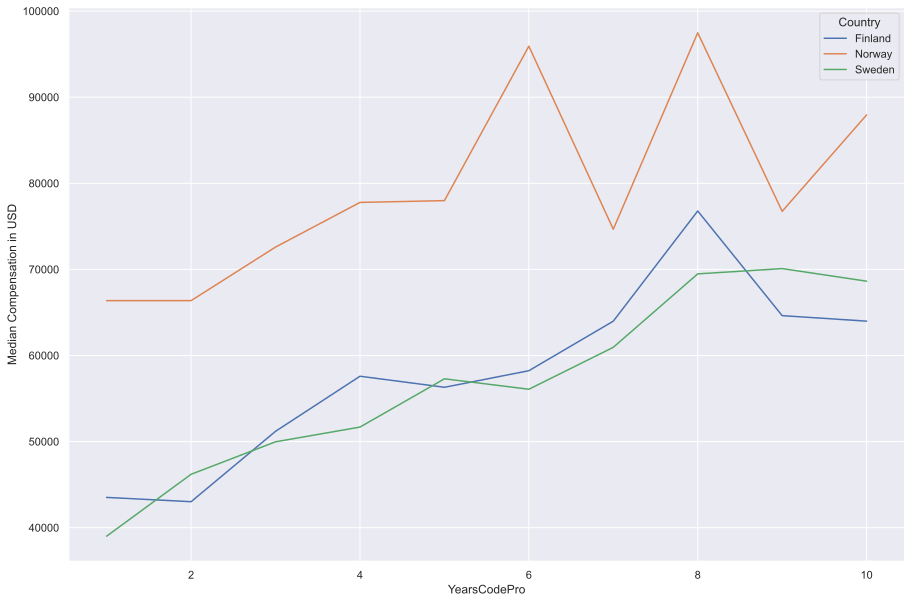

In [144]:
scandinavian_countries = [
    'Norway',
    'Sweden',
    'Finland',
]
whitelist_and_plot(ddf, scandinavian_countries)

### Europe

In [150]:
ddf['Country'].unique()

array(['United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'Czech Republic', 'Italy', 'Germany',
       'Netherlands', 'Canada', 'Sweden', 'Israel', 'Turkey', 'Romania',
       'Bulgaria', 'Greece', 'Belgium', 'Poland', 'China', 'Montenegro',
       'Finland', 'Spain', 'Viet Nam', 'France', 'Tunisia', 'Switzerland',
       'Bangladesh', 'Maldives', 'Australia', 'Mexico', 'Hungary',
       'Norway', 'Egypt', 'Thailand', 'Denmark', 'Brazil', 'Pakistan',
       'Nepal', 'Croatia', 'South Africa', 'Austria',
       'Russian Federation', 'Costa Rica', 'India', 'Lithuania',
       'Hong Kong (S.A.R.)', 'New Zealand', 'Morocco', 'Philippines',
       'Portugal', 'Slovenia', 'Afghanistan', 'Estonia',
       'Iran, Islamic Republic of...', 'Ireland', 'Ukraine', 'Indonesia',
       'Lebanon', 'Japan', 'South Korea', 'Argentina', 'Malaysia',
       'Azerbaijan', 'Singapore', 'Belarus', 'Peru', 'Taiwan',
       'Sri Lanka', 'Saudi Arabia', 'Ethiopia', 'Bosnia

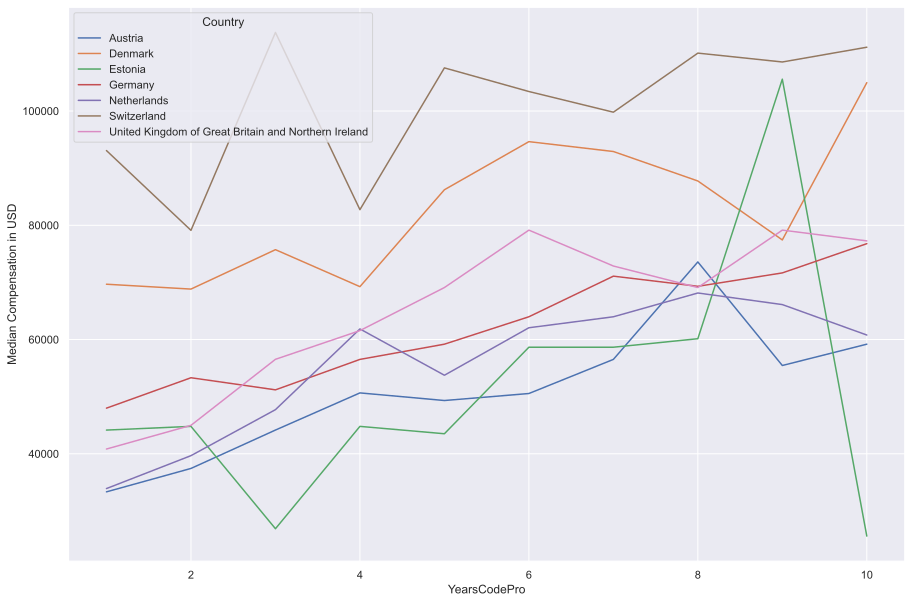

In [151]:
european_countries = [
    'Netherlands',
    'Denmark',
    'United Kingdom',
    'United Kingdom of Great Britain and Northern Ireland',
    'Austria',
    'Switzerland',
    'Germany',
    'Estonia'
]
whitelist_and_plot(ddf, european_countries)

### Other

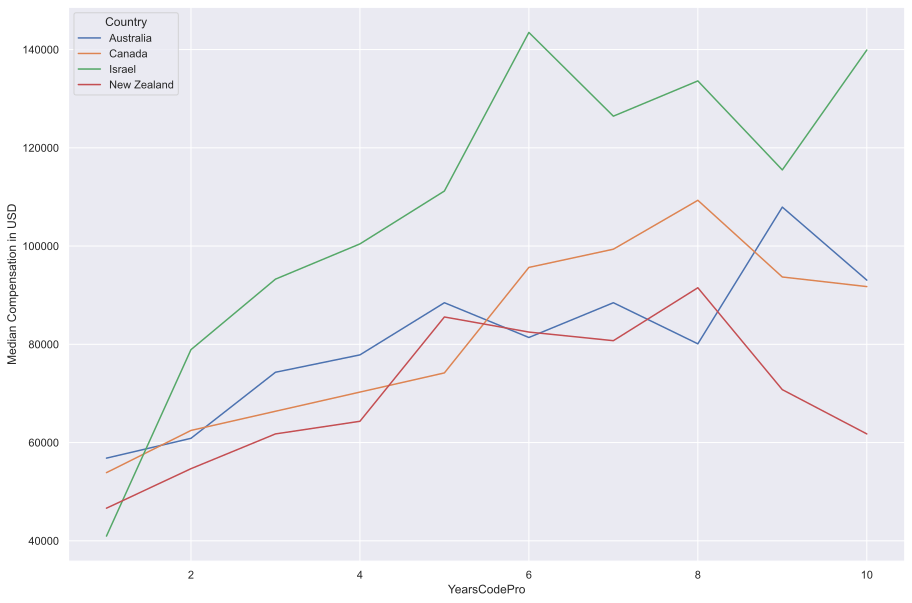

In [146]:
other = [
    'United States',
    'Canada',
    'Australia',
    'Israel',
    'New Zealand',
]
whitelist_and_plot(ddf, other)

### Asian

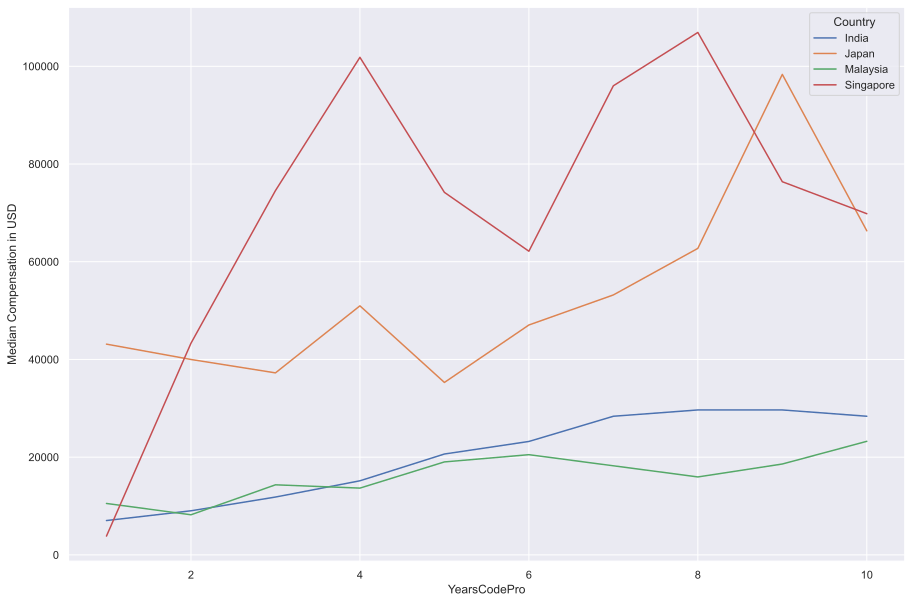

In [152]:
asian = [
    'India',
    'Singapore',
    'Malaysia',
    # 'Taiwan',
    'Japan'
]
whitelist_and_plot(ddf, asian)

## Conclusion

Expect 75k-100k in USA and 45k-55k EUR in Europe and fuck Asia. 

Estonia looks bad on paper, but their taxes are really low (21%). 30k EUR is pretty good. While Germany has 42% tax.
